# Linear Regression với Gradient Descent

Trong notebook này, chúng ta sẽ giải quyết bài toán **dự đoán giá nhà từ diện tích (m²)** bằng hồi quy tuyến tính.  
Khác với ví dụ trước dùng **Normal Equation**, ở đây ta sẽ huấn luyện mô hình bằng **Gradient Descent**.


## 1. Bài toán đặt ra

- Input: diện tích nhà (m²).  
- Output: giá nhà (đơn vị giả định).  

Giả định mối quan hệ tuyến tính giữa diện tích và giá nhà. Ta cần tìm tham số mô hình \( w = [w_0, w_1] \) sao cho:  

\[
y ≈ w₀ + w₁ ⋅ x
\]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Dữ liệu và trực quan hóa

Dữ liệu gồm hai cột:  
- Cột 1: diện tích (m²).  
- Cột 2: giá nhà.  

Chúng ta sẽ vẽ biểu đồ phân tán để quan sát mối quan hệ giữa diện tích và giá.


## 3. Xây dựng mô hình bằng Gradient Descent

### 3.1. Ý tưởng
- Hàm dự đoán: \( y = w_0 + w_1 x \)
- Hàm mất mát (MSE):  

\[
J(w) = 1/2m*sum_{i=1}^m (y^(i) - ^y^(i))^2
\]

- Gradient Descent cập nhật tham số:  

\[
w_j := w_j - \alpha*{\partial J(w)}{\partial w_j}
\]

với \( \alpha \) là **learning rate**.

### 3.2. Ý nghĩa từng bước trong code
1. **Thêm cột 1 vào ma trận X**: để tính hệ số chệch (bias).  
2. **Khởi tạo trọng số \(w = [0,1]\)**: giá trị ban đầu.  
3. **Tính sai số \(r = Xw - y\)**: chênh lệch dự đoán và giá trị thật.  
4. **Tính cost = 0.5 * sum(r²)**: đánh giá chất lượng mô hình ở mỗi vòng lặp.  
5. **Cập nhật w0 và w1** theo công thức Gradient Descent.  
6. Lặp lại nhiều lần để dần tiệm cận nghiệm tối ưu.


[13929872.64455245]
[10306582.37422079]
[7625999.18237673]
[5642849.69326854]
[4175675.71851866]
[3090230.83195734]
[2287196.82094014]
[1693096.06938209]
[1253568.35550934]
[928396.89128833]
[687828.48611463]
[509851.12972016]
[378179.89312088]
[280766.8575313]
[208698.72973386]
[155381.27570385]
[115935.94816237]
[86753.4994753]
[65163.7354763]
[49191.19268689]
[37374.38339803]
[28632.06953731]
[22164.32937972]
[17379.36470576]
[13839.35126131]
[11220.37783611]
[9282.80838638]
[7849.35533562]
[6788.85776037]
[6004.28016513]
[5423.83373397]
[4994.40765352]
[4676.70947326]
[4441.66984614]
[4267.78268312]
[4139.13734594]
[4043.96282366]
[3973.55068504]
[3921.4582571]
[3882.91912046]
[3854.40698198]
[3833.3130189]
[3817.70717153]
[3806.16154282]
[3797.61974572]
[3791.30024382]
[3786.62484071]
[3783.16577503]
[3780.60658031]
[3778.71312826]
[3777.31220606]
[3776.27566738]
[3775.50870698]
[3774.94118601]
[3774.52121437]
[3774.21040269]
[3773.98034975]
[3773.81004376]
[3773.68393976]
[3773.5

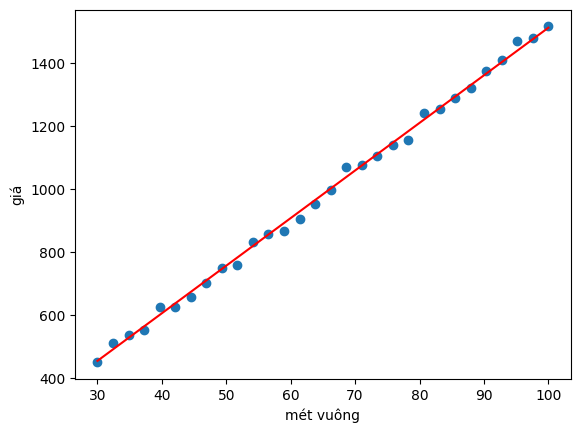

In [9]:
data = pd.read_csv('data_linear.csv').values
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
plt.scatter(x, y)
plt.xlabel('mét vuông')
plt.ylabel('giá')

x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,1.]).reshape(-1,1)

numOfIteration = 100
cost = np.zeros((numOfIteration,1))
learning_rate = 0.000001
for i in range(1, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    w[0] -= learning_rate*np.sum(r)
    # correct the shape dimension
    w[1] -= learning_rate*np.sum(np.multiply(r, x[:,1].reshape(-1,1)))
    print(cost[i])
predict = np.dot(x, w)
plt.plot((x[0][1], x[N-1][1]),(predict[0], predict[N-1]), 'r')
plt.show()


## 4. Dự đoán thử

Sau khi huấn luyện xong, ta sẽ:
- Thử dự đoán giá nhà với diện tích 50 m².

In [10]:
x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)

Giá nhà cho 50m^2 là :  [755.68795083]


## 5. Thảo luận

### Ưu điểm của Gradient Descent:
- Áp dụng được cho dữ liệu lớn mà không cần tính nghịch đảo ma trận.  
- Linh hoạt, có thể mở rộng cho nhiều biến.  

### Nhược điểm:
- Cần lựa chọn learning rate phù hợp.  
- Kết quả chỉ là xấp xỉ, phụ thuộc số vòng lặp.  
- Tốn thời gian hơn nếu dữ liệu nhỏ (so với Normal Equation).  

👉 Như vậy, **Normal Equation** phù hợp với dữ liệu nhỏ, còn **Gradient Descent** phù hợp cho dữ liệu lớn và phức tạp.
